<a href="https://colab.research.google.com/github/eshreyareddy/CRISP-DM-SEMMA-KDD/blob/main/CRISPDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()


Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
import pandas as pd

# Load the Netflix dataset
file_path = 'supermarket_sales.csv'
supermarket_sales_df = pd.read_csv(file_path)

# Display basic information about the dataset
supermarket_sales_df.info()

# Display the first few rows of the dataset
supermarket_sales_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


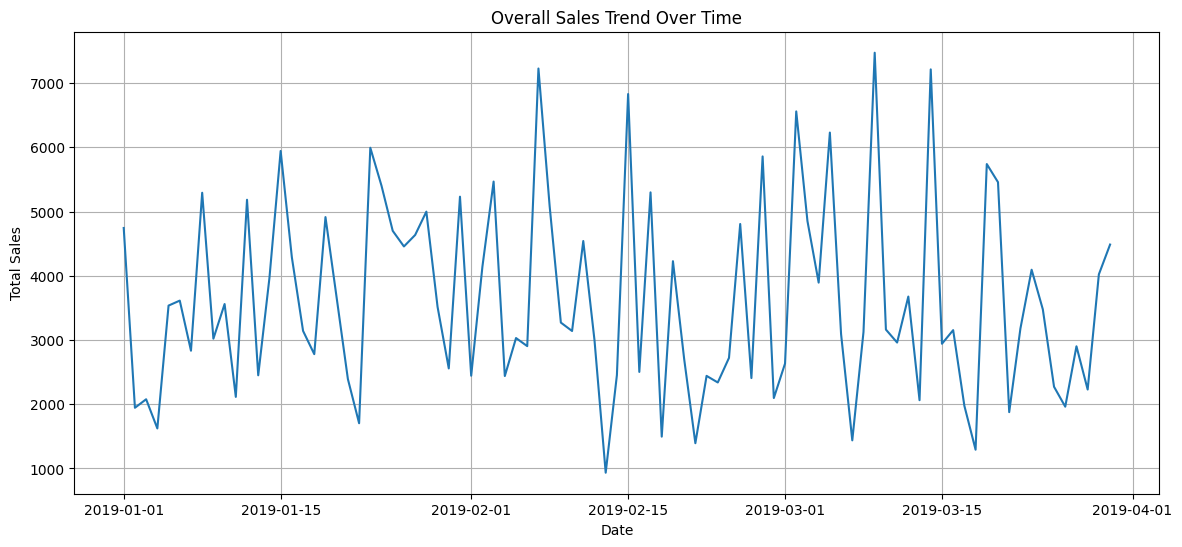

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime format
supermarket_sales_df['Date'] = pd.to_datetime(supermarket_sales_df['Date'])

# Group by 'Date' and calculate the total sales for each day
sales_trend = supermarket_sales_df.groupby('Date')['Total'].sum().reset_index()

# Plot the overall sales trend over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Total', data=sales_trend)
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


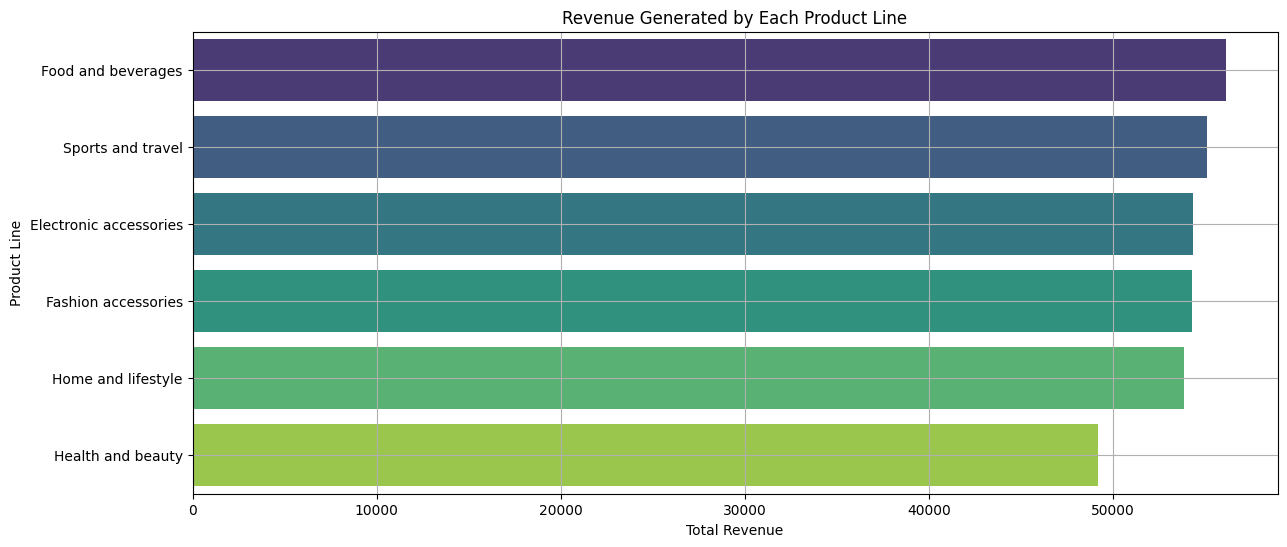

,Product line,Total
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
3,Health and beauty,49193.7390


In [ ]:
# Group by 'Product line' and calculate the total sales for each product line
product_line_revenue = supermarket_sales_df.groupby('Product line')['Total'].sum().reset_index()

# Sort the product lines by total sales in descending order
product_line_revenue = product_line_revenue.sort_values(by='Total', ascending=False)

# Plot the total sales for each product line
plt.figure(figsize=(14, 6))
sns.barplot(x='Total', y='Product line', data=product_line_revenue, palette='viridis')
plt.title('Revenue Generated by Each Product Line')
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')
plt.grid(True)
plt.show()

# Display the product lines and their total revenue
product_line_revenue


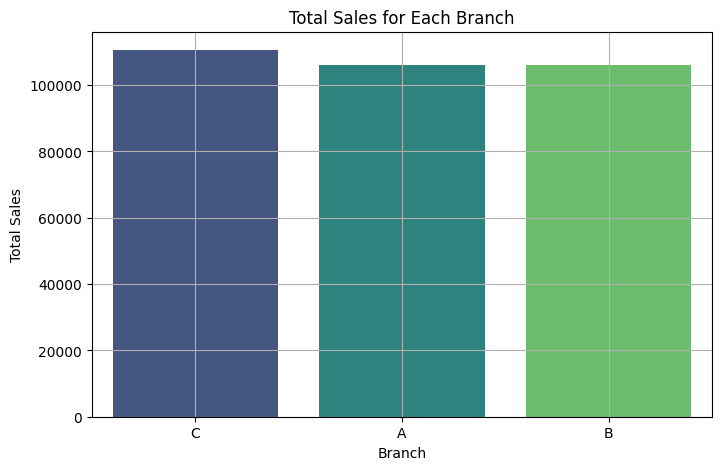

,Branch,Total
2,C,110568.7065
0,A,106200.3705
1,B,106197.6720


In [ ]:
# Group by 'Branch' and calculate the total sales for each branch
branch_sales = supermarket_sales_df.groupby('Branch')['Total'].sum().reset_index()

# Sort the branches by total sales in descending order
branch_sales = branch_sales.sort_values(by='Total', ascending=False)

# Plot the total sales for each branch
plt.figure(figsize=(8, 5))
sns.barplot(x='Branch', y='Total', data=branch_sales, palette='viridis')
plt.title('Total Sales for Each Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Display the branches and their total sales
branch_sales


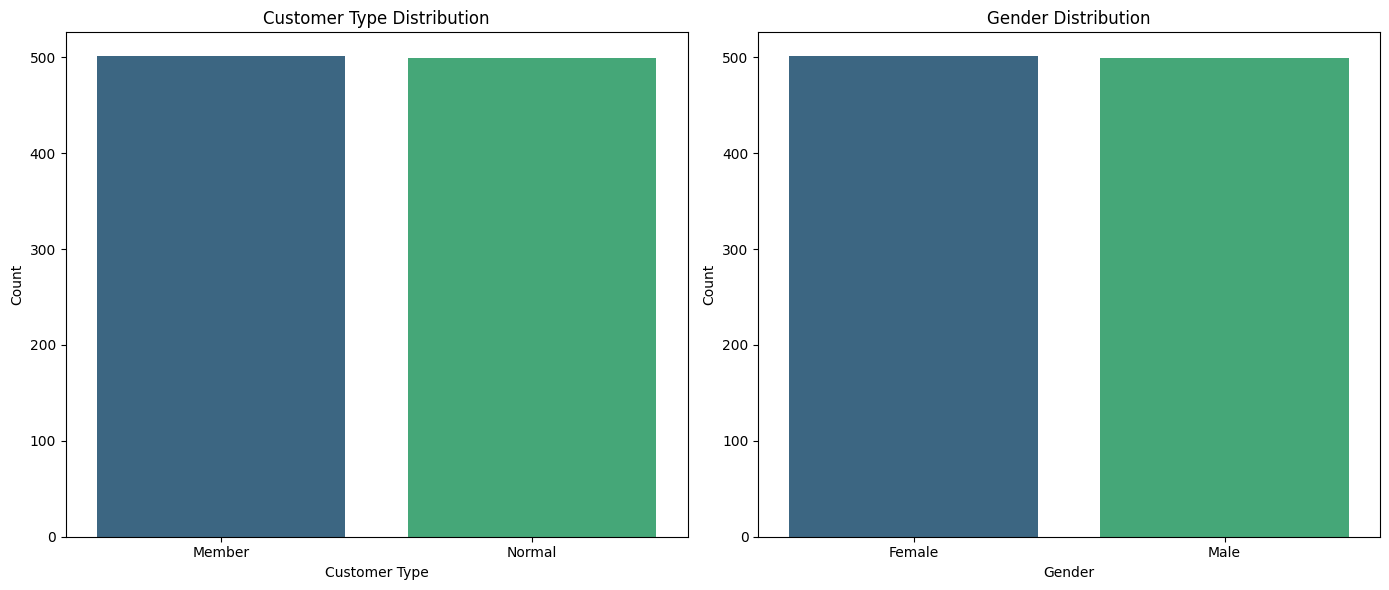

In [ ]:
# Customer Type and Gender Distribution
plt.figure(figsize=(14, 6))

# Subplot 1: Customer Type Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Customer type', data=supermarket_sales_df, palette='viridis')
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Subplot 2: Gender Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=supermarket_sales_df, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


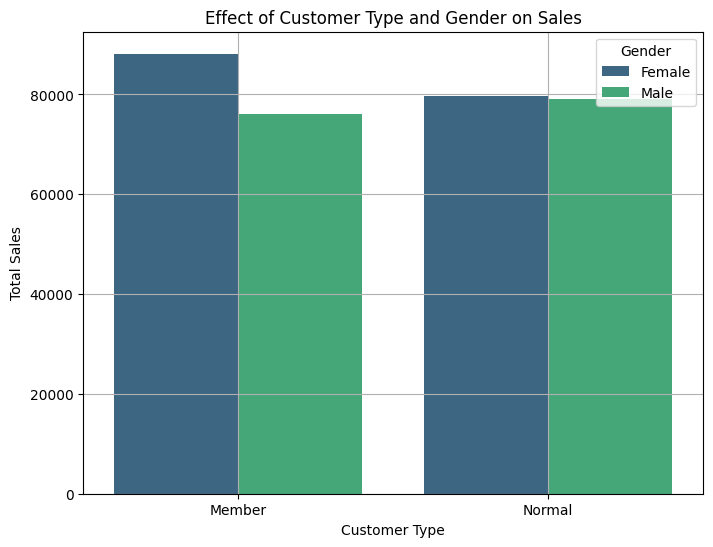

Gender,Customer type,Female,Male
0,Member,88146.9435,76076.5005
1,Normal,79735.9815,79007.3235


In [ ]:
# Group by 'Customer type' and 'Gender' and calculate the total sales for each group
customer_sales = supermarket_sales_df.groupby(['Customer type', 'Gender'])['Total'].sum().reset_index()

# Pivot the table for better visualization
customer_sales_pivot = customer_sales.pivot(index='Customer type', columns='Gender', values='Total').reset_index()

# Plot the total sales based on customer type and gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer type', y='Total', hue='Gender', data=customer_sales, palette='viridis')
plt.title('Effect of Customer Type and Gender on Sales')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Display the total sales based on customer type and gender
customer_sales_pivot


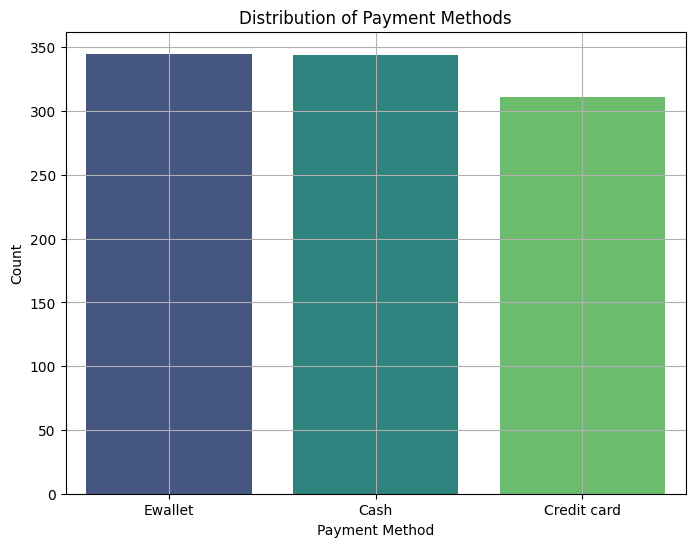

In [ ]:
# Plot the distribution of different payment methods used by customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment', data=supermarket_sales_df, palette='viridis', order=supermarket_sales_df['Payment'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(True)
plt.show()


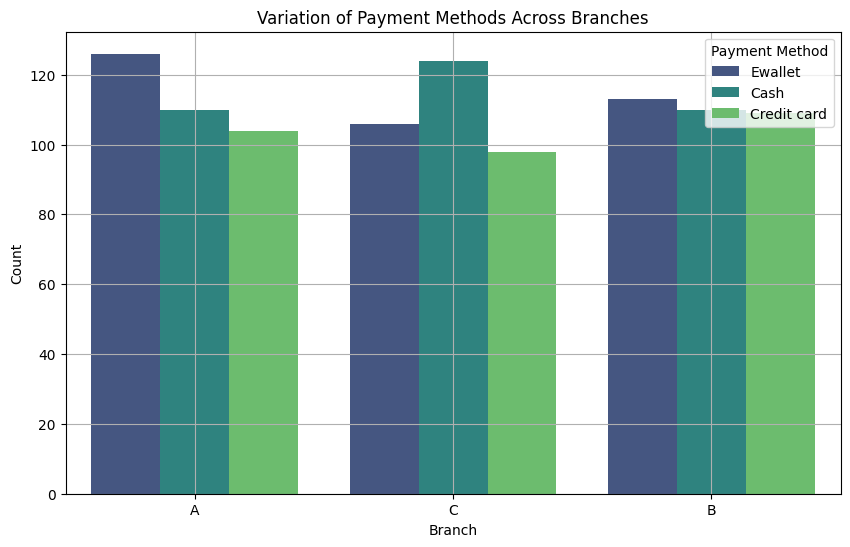

In [ ]:
# Plot the variation of payment methods across different branches
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', hue='Payment', data=supermarket_sales_df, palette='viridis')
plt.title('Variation of Payment Methods Across Branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.grid(True)
plt.show()


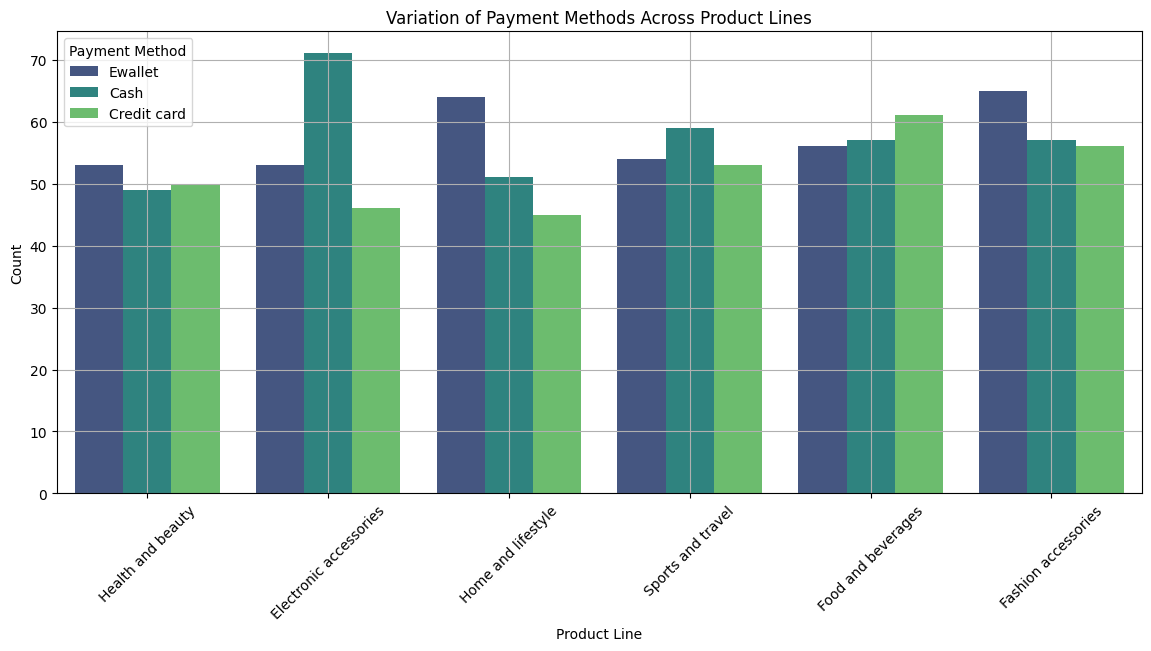

In [ ]:
# Plot the variation of payment methods across different product lines
plt.figure(figsize=(14, 6))
sns.countplot(x='Product line', hue='Payment', data=supermarket_sales_df, palette='viridis')
plt.title('Variation of Payment Methods Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.grid(True)
plt.show()


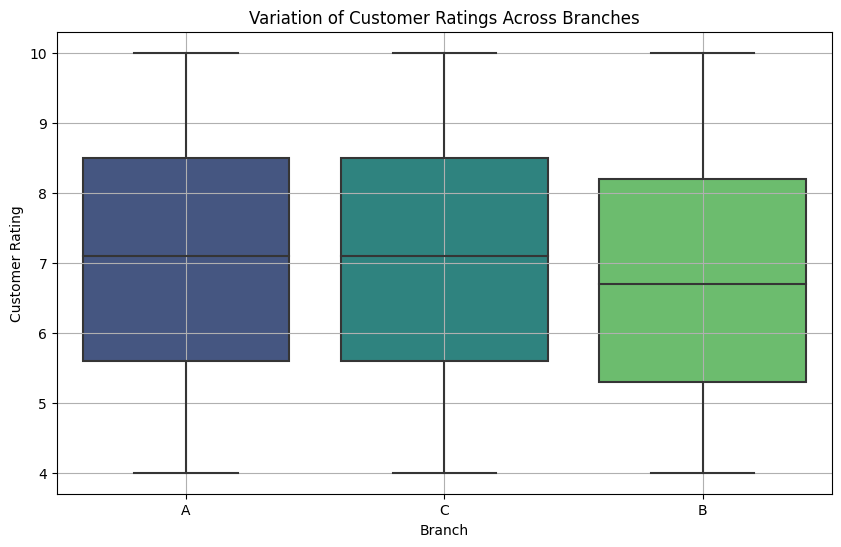

In [ ]:
# Plot the distribution of customer ratings across different branches
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='Rating', data=supermarket_sales_df, palette='viridis')
plt.title('Variation of Customer Ratings Across Branches')
plt.xlabel('Branch')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()


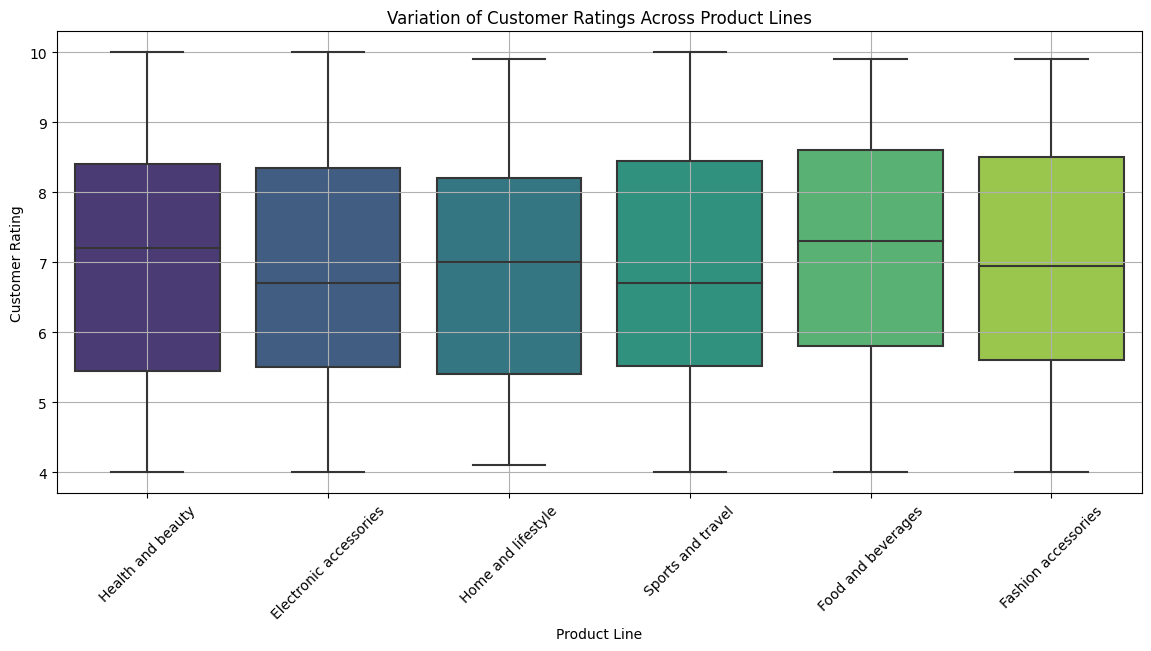

In [ ]:
# Plot the distribution of customer ratings across different product lines
plt.figure(figsize=(14, 6))
sns.boxplot(x='Product line', y='Rating', data=supermarket_sales_df, palette='viridis')
plt.title('Variation of Customer Ratings Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Customer Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


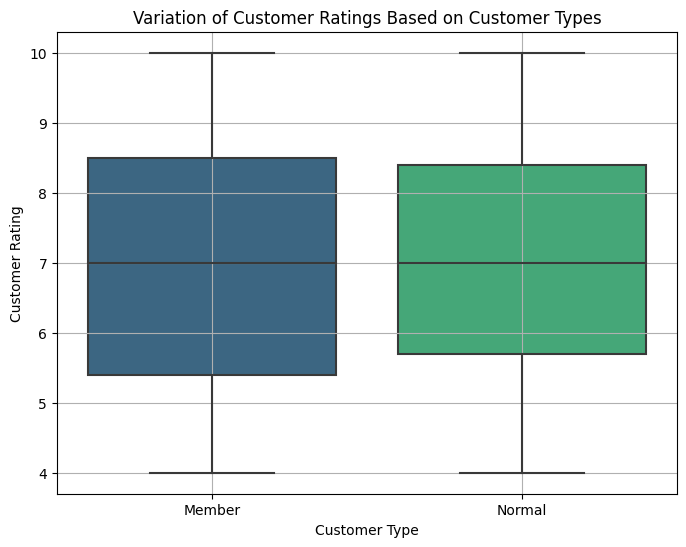

In [ ]:
# Plot the distribution of customer ratings based on customer types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer type', y='Rating', data=supermarket_sales_df, palette='viridis')
plt.title('Variation of Customer Ratings Based on Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()


In [ ]:
# Check for missing values in the supermarket_sales_df dataset
missing_values = supermarket_sales_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)



In [ ]:
# One-Hot Encoding for nominal variables
nominal_columns = ['Gender', 'Customer type', 'Product line', 'Payment', 'Branch']
df_encoded = pd.get_dummies(supermarket_sales_df, columns=nominal_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())


    Invoice ID       City  Unit price  Quantity   Tax 5%     Total       Date  \
0  750-67-8428     Yangon       74.69         7  26.1415  548.9715 2019-01-05   
1  226-31-3081  Naypyitaw       15.28         5   3.8200   80.2200 2019-03-08   
2  631-41-3108     Yangon       46.33         7  16.2155  340.5255 2019-03-03   
3  123-19-1176     Yangon       58.22         8  23.2880  489.0480 2019-01-27   
4  373-73-7910     Yangon       86.31         7  30.2085  634.3785 2019-02-08   

    Time    cogs  gross margin percentage  ...  Customer type_Normal  \
0  13:08  522.83                 4.761905  ...                     0   
1  10:29   76.40                 4.761905  ...                     1   
2  13:23  324.31                 4.761905  ...                     1   
3  20:33  465.76                 4.761905  ...                     0   
4  10:37  604.17                 4.761905  ...                     1   

   Product line_Fashion accessories  Product line_Food and beverages  \
0       

In [ ]:
print(supermarket_sales_df.columns)



Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year'],
      dtype='object')


In [ ]:
avg_spending_per_customer = supermarket_sales_df.groupby('Invoice ID')['Total'].mean()
supermarket_sales_df = supermarket_sales_df.merge(avg_spending_per_customer, on='Invoice ID', how='left', suffixes=('', '_avg_per_customer'))


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()




Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
import pandas as pd

# Assuming the file is in the current directory
supermarket_sales_df = pd.read_csv("supermarket_sales.csv")


In [ ]:
print(supermarket_sales_df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [ ]:
avg_spending_per_customer = supermarket_sales_df.groupby('Invoice ID')['Total'].mean()
supermarket_sales_df = supermarket_sales_df.merge(avg_spending_per_customer, on='Invoice ID', how='left', suffixes=('', '_avg_per_customer'))


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns that need scaling
numerical_cols = ['Total', 'Quantity', 'Unit price']  # Replace with actual numerical column names

# Standardization
scaler = StandardScaler()
supermarket_sales_df[numerical_cols] = scaler.fit_transform(supermarket_sales_df[numerical_cols])

# Alternatively, for Normalization
# scaler = MinMaxScaler()
# supermarket_sales_df[numerical_cols] = scaler.fit_transform(supermarket_sales_df[numerical_cols])


In [ ]:
print(y.value_counts())



 1.061043    3
-0.606167    2
-1.168071    2
-1.379163    2
 0.672090    2
            ..
 0.086018    1
-0.302935    1
-0.485327    1
-0.286319    1
 1.233617    1
Name: Unit price, Length: 943, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)



Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')


In [ ]:
# Identify the non-numeric columns in the training data
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
non_numeric_cols


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
supermarket_sales_df = pd.read_csv("supermarket_sales.csv")

# Define features and target
X = supermarket_sales_df.drop('Customer type', axis=1)  # Assuming 'Category' is the target column
y = supermarket_sales_df['Customer type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['Invoice ID', 'Branch', 'City', 'Gender', 'Product line', 'Date',
       'Time', 'Payment'],
      dtype='object')


In [ ]:
# Load the dataset and split it
supermarket_sales_df = pd.read_csv("supermarket_sales.csv")

# Define features and target
X = supermarket_sales_df.drop('Customer type', axis=1)  # Assuming 'Category' is the target column
y = supermarket_sales_df['Customer type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify the non-numeric columns in the training data
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
non_numeric_cols


Index(['Invoice ID', 'Branch', 'City', 'Gender', 'Product line', 'Date',
       'Time', 'Payment'],
      dtype='object')

In [ ]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)  # drop_first helps reduce multicollinearity
X_test_encoded = pd.get_dummies(X_test, drop_first=True)


In [ ]:
# One-hot encode the categorical variables in the training and testing data
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Display the first few rows of the encoded training data to verify
X_train_encoded.head()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Invoice ID_102-06-2002,Invoice ID_102-77-2261,...,Time_20:46,Time_20:47,Time_20:48,Time_20:50,Time_20:51,Time_20:54,Time_20:55,Time_20:59,Payment_Credit card,Payment_Ewallet
29,24.89,9,11.2005,235.2105,224.01,4.761905,11.2005,7.4,0,0,...,0,0,0,0,0,0,0,0,0,0
535,16.67,7,5.8345,122.5245,116.69,4.761905,5.8345,7.4,0,0,...,0,0,0,0,0,0,0,0,0,1
695,87.37,5,21.8425,458.6925,436.85,4.761905,21.8425,6.6,0,0,...,0,0,0,0,0,0,0,0,0,0
557,98.52,10,49.2600,1034.4600,985.20,4.761905,49.2600,4.5,0,0,...,0,0,0,0,0,0,0,0,0,1
836,38.54,5,9.6350,202.3350,192.70,4.761905,9.6350,5.6,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# One-hot encode both training and test datasets
X_train_encoded_full = pd.get_dummies(X_train, drop_first=True, dummy_na=True)  # Including dummy_na=True to handle NaN values
X_test_encoded_full = pd.get_dummies(X_test, drop_first=True, dummy_na=True)

# Align the datasets to have the same columns
X_train_aligned, X_test_aligned = X_train_encoded_full.align(X_test_encoded_full, join='left', axis=1)

# Fill any new columns (that were in test but not in train) with 0
X_test_aligned.fillna(0, inplace=True)

# Train the logistic regression model again
logreg.fit(X_train_aligned, y_train)

# Predict on the test set
y_pred_aligned = logreg.predict(X_test_aligned)

# Calculate accuracy
accuracy_aligned = accuracy_score(y_test, y_pred_aligned)

# Display the accuracy and classification report
accuracy_aligned, classification_report(y_test, y_pred_aligned)



(0.54,
 '              precision    recall  f1-score   support\n\n      Member       0.53      0.52      0.52        97\n      Normal       0.55      0.56      0.56       103\n\n    accuracy                           0.54       200\n   macro avg       0.54      0.54      0.54       200\nweighted avg       0.54      0.54      0.54       200\n')